# ML II : Linear models


L'objectif de ce notebook est de vous familiariser avec l'approche machine learning.

Les données sont issues de Kaggle, disponibles sur [ce lien](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

*01/12/26*

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


## Lecture et mise en forme des données

In [22]:
df = pd.read_csv('train.csv')

# on ne garde que les colonnes numériques
numerical_df = df.select_dtypes(include='number')\
                .drop(columns=["Id"])\
                .dropna(axis="rows", how="any") # on enlève les lignes avec des NaN


numerical_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [23]:
X, y = numerical_df.drop(columns=["SalePrice"]), numerical_df["SalePrice"]

## Train test split pour évaluer la performance du modèle

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)


In [25]:
len(X_train), len(X_test)

(896, 225)

In [26]:
len(X)

1121

## Compare validation RMSE by predicting the log of the target for MLR (Multiple linear regression)

La distribution de la target est très asymétrique, on va donc prédire le log de la target (plus proche d'une gaussienne) pour améliorer la performance du modèle.

<Axes: ylabel='Frequency'>

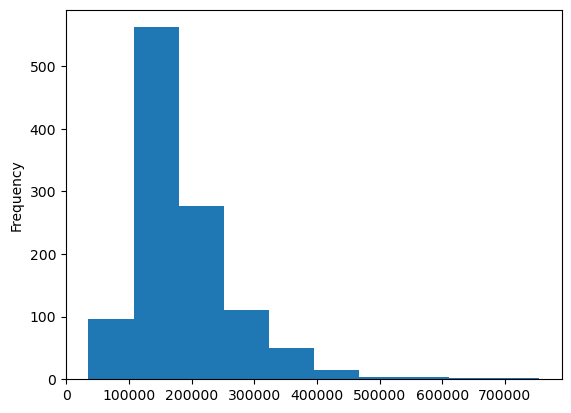

In [27]:
y.plot(kind="hist")

<Axes: ylabel='Frequency'>

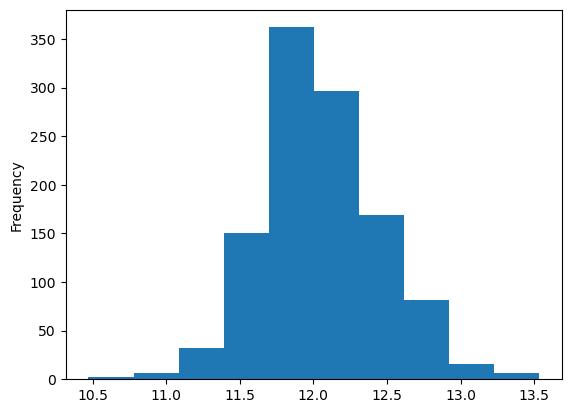

In [28]:
import numpy as np

np.log(y).plot(kind="hist")

In [29]:
model = LinearRegression()
model

LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import root_mean_squared_error as rmse

mse_train = rmse(y_train, y_train_pred)
mse_test = rmse(y_test, y_test_pred)

print(f"Train RMSE y: {mse_train:.2f}")
print(f"Test RMSE y: {mse_test:.2f}")

Train RMSE y: 35608.43
Test RMSE y: 39852.60


In [ ]:
model

LinearRegression()

In [ ]:
test_michel = X_test.sample(3, random_state=2).values

test_michel

array([[   20, 12400,     6,     7,  1958,  1998,   585,     0,   630,
         1215,  1215,     0,     0,  1215,     0,     0,     1,     0,
            3,     1,     6,     0,     1,   297,     0,     0,     0,
            0,   234,     0,     0,     6,  2009],
       [   20, 16285,     7,     5,  2001,  2002,     0,     0,  1413,
         1413,  1430,     0,     0,  1430,     0,     0,     2,     0,
            3,     1,     6,     0,     2,   605,     0,    33,     0,
            0,     0,     0,     0,     6,  2009],
       [   70,  6120,     5,     8,  1920,  2004,     0,     0,   939,
          939,   939,   574,     0,  1513,     0,     0,     1,     1,
            4,     1,     8,     0,     1,   180,    24,     0,   150,
            0,     0,     0,     0,     5,  2007]])

In [ ]:
model.predict(test_michel)

/home/basile/.conda/envs/base_ds/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([168165.67691413, 200682.77733765, 124029.66294206])

In [ ]:
log_y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train, y_train)

y_train_pred = model_log.predict(X_train)
y_test_pred = model_log.predict(X_test)

from sklearn.metrics import root_mean_squared_error as rmse

np.exp(rmse(y_train, y_train_pred)), np.exp(rmse(y_test, y_test_pred))

NameError: name 'y' is not defined

In [ ]:
# compare validation RMSE by standardizing input feature in MLR
# is there an effect on the score ? why ? 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(), LinearRegression())

pipe


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.fit


In [ ]:
# compare validation RMSE by removing outliers from training dateset in MLR

In [ ]:
# compare validation RMSE by removing highly correlated (positively or negatively) input feature in MLR

In [ ]:
# implement a RepeatedKFold cross validation scheme
# check the variability of the coefficients woth or without correlated variables

In [ ]:
# train all models seen in class MLR, Lasso, Ridge, Elastic Net